## **House Price Prediction [ Linear Regression ]**
---
####**Name :** Tejas Kumbhar
####**Roll_no :** 21102B0004
####**Github_Link :** https://github.com/T8jas-lab/ML_projects
---
###**Description of Linear Regression for House Price Prediction**
Linear regression is a statistical method used to model the relationship between a dependent variable (target variable) and one or more independent variables (predictors). In the context of predicting house prices, linear regression seeks to find the linear relationship between various features of a house and its corresponding price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("housing.csv")
data.shape

(20640, 10)

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


#### Split the data set into train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

train_data = X_train.join(y_train)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1367,-122.14,38.01,50.0,1760.0,341.0,741.0,316.0,4.5000,NEAR BAY,178300.0
1353,-121.95,38.02,9.0,3360.0,833.0,2041.0,810.0,2.1013,INLAND,100700.0
4038,-118.51,34.16,23.0,11154.0,1995.0,4076.0,1809.0,5.4609,<1H OCEAN,500001.0
3451,-118.44,34.32,14.0,6235.0,1286.0,3568.0,1190.0,4.1724,<1H OCEAN,211600.0
1699,-122.28,37.96,35.0,1579.0,243.0,734.0,264.0,5.5000,NEAR BAY,201000.0
...,...,...,...,...,...,...,...,...,...,...
10650,-117.75,33.54,21.0,8711.0,1544.0,3173.0,1396.0,5.0907,<1H OCEAN,378200.0
980,-121.87,37.67,28.0,1812.0,294.0,853.0,278.0,4.9879,INLAND,229400.0
15534,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,<1H OCEAN,190500.0
4207,-118.25,34.11,39.0,1415.0,369.0,1467.0,351.0,3.0150,<1H OCEAN,156300.0


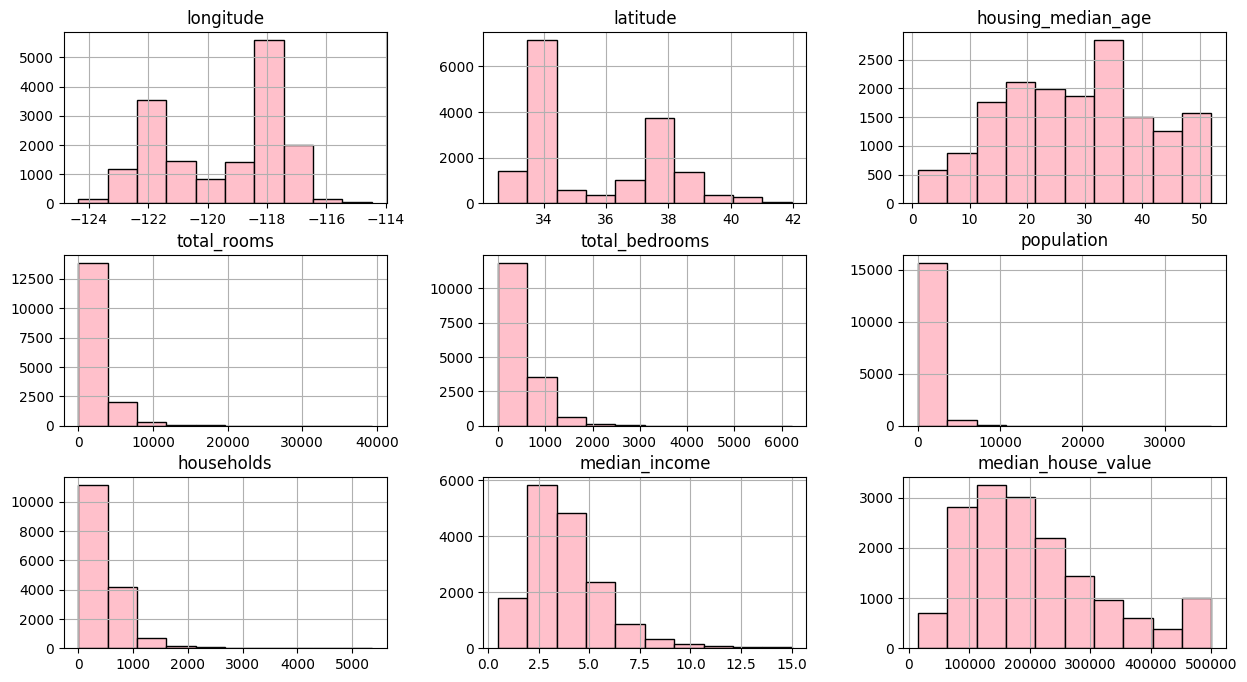

In [14]:
train_data.hist(figsize=(15, 8), color='pink', edgecolor='black' )  # Example color, you can use any valid color name or RGB code
plt.show()


- drop the non-numeric column ‘ocean_proximity’ temporarily to plot a heatmap of the correlation matrix.

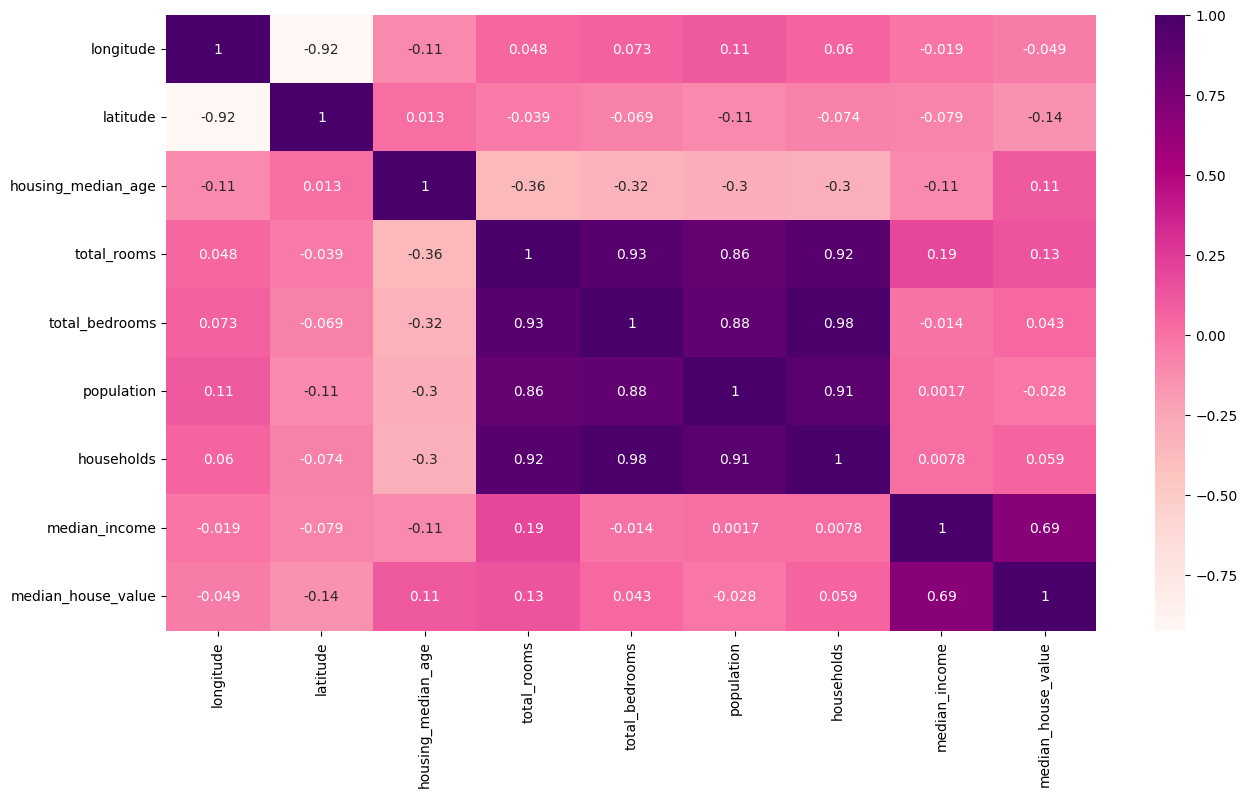

In [22]:
temp_train_data = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(temp_train_data.corr(), annot=True, cmap="RdPu")
plt.show()

### Data Preprocessing

In [23]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

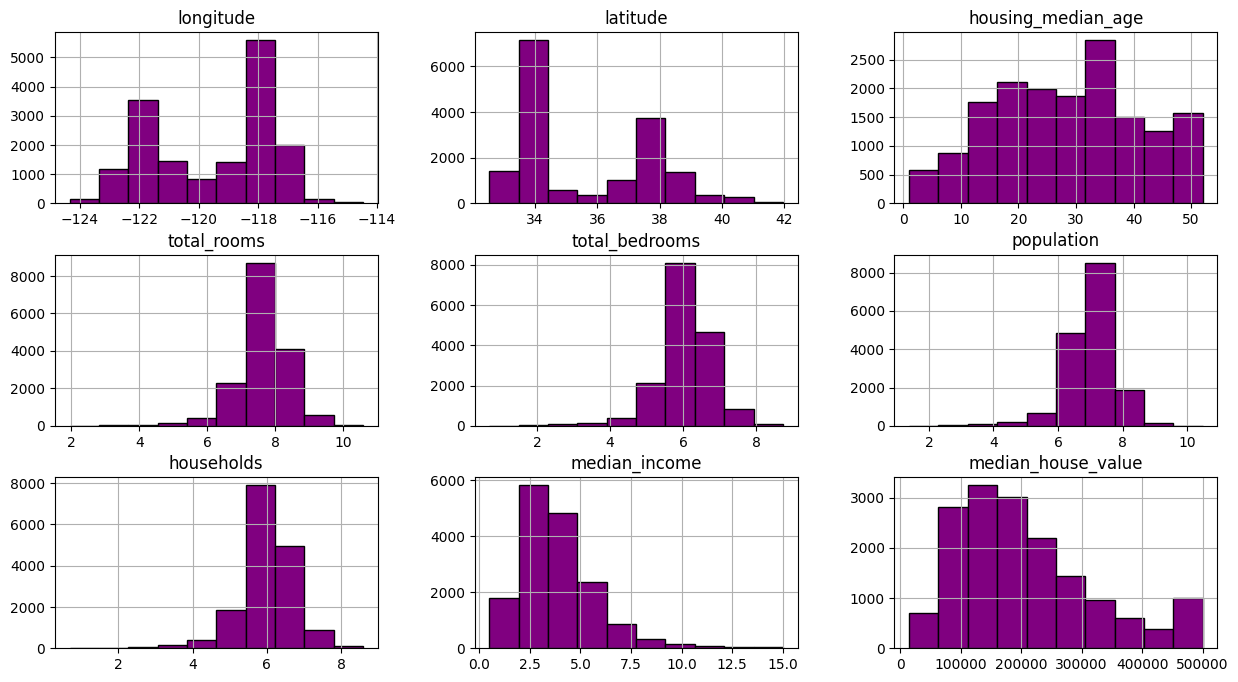

In [25]:
train_data.hist(figsize=(15,8), color = 'purple', edgecolor = 'black')
plt.show()

### Encoding Categorical Features
- Encode the categorical feature ‘ocean_proximity’ using one-hot encoding.

In [26]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7191
INLAND        5235
NEAR OCEAN    2115
NEAR BAY      1803
ISLAND           2
Name: count, dtype: int64

In [27]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [28]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1367,-122.14,38.01,50.0,7.473637,5.834811,6.609349,5.758902,4.5000,178300.0,False,False,False,True,False
1353,-121.95,38.02,9.0,8.119994,6.726233,7.621685,6.698268,2.1013,100700.0,False,True,False,False,False
4038,-118.51,34.16,23.0,9.319643,7.598900,8.313117,7.501082,5.4609,500001.0,True,False,False,False,False
3451,-118.44,34.32,14.0,8.738094,7.160069,8.180041,7.082549,4.1724,211600.0,True,False,False,False,False
1699,-122.28,37.96,35.0,7.365180,5.497168,6.599870,5.579730,5.5000,201000.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,-117.75,33.54,21.0,9.072457,7.342779,8.062748,7.242082,5.0907,378200.0,True,False,False,False,False
980,-121.87,37.67,28.0,7.502738,5.686975,6.749931,5.631212,4.9879,229400.0,False,True,False,False,False
15534,-117.11,33.14,10.0,8.073715,6.456770,7.241366,6.368187,3.4455,190500.0,True,False,False,False,False
4207,-118.25,34.11,39.0,7.255591,5.913503,7.291656,5.863631,3.0150,156300.0,True,False,False,False,False


### Updated Correlation Matrix

- After preprocessing, Plot the updated correlation matrix.

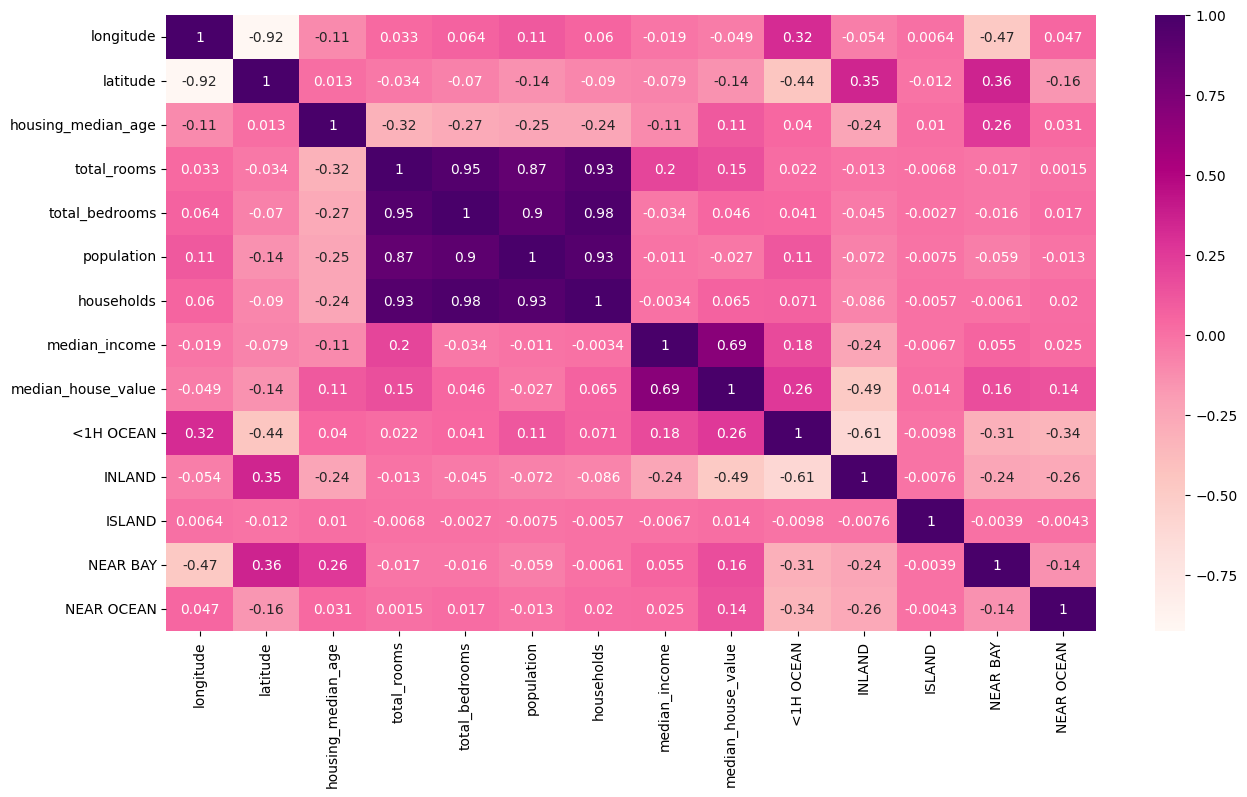

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdPu")
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

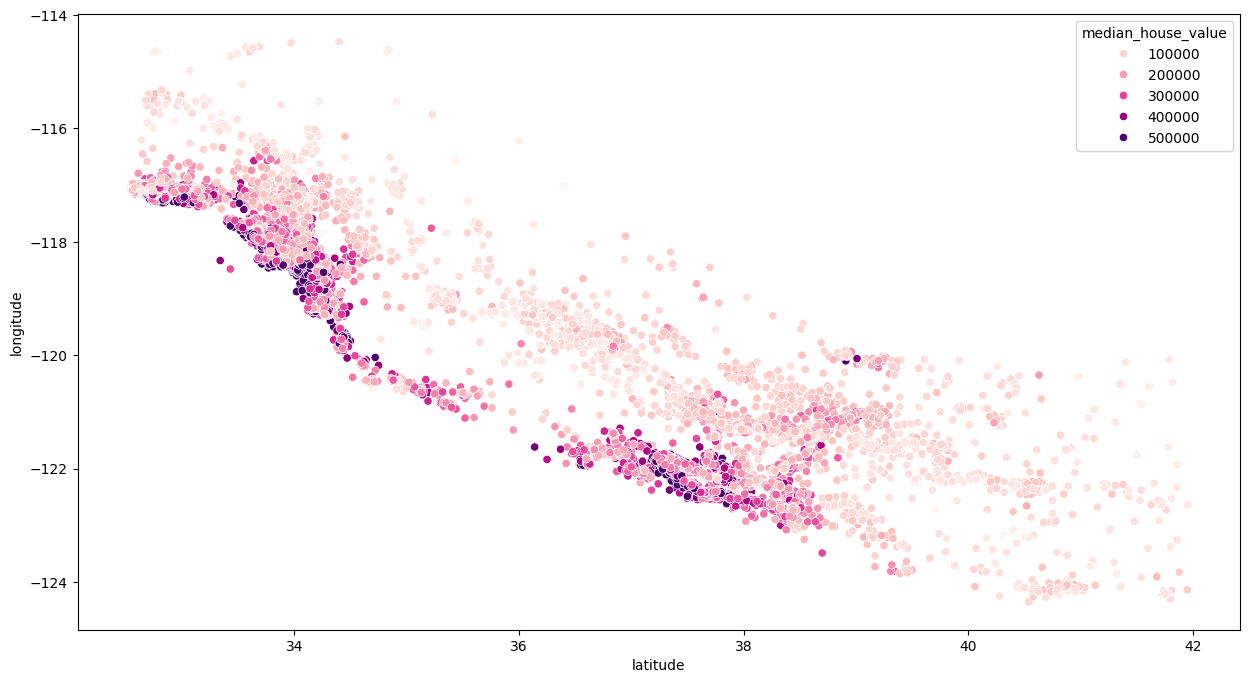

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='RdPu')

## Feature Engineering
- Create new features based on existing ones to provide more information to our model.
---

In [33]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

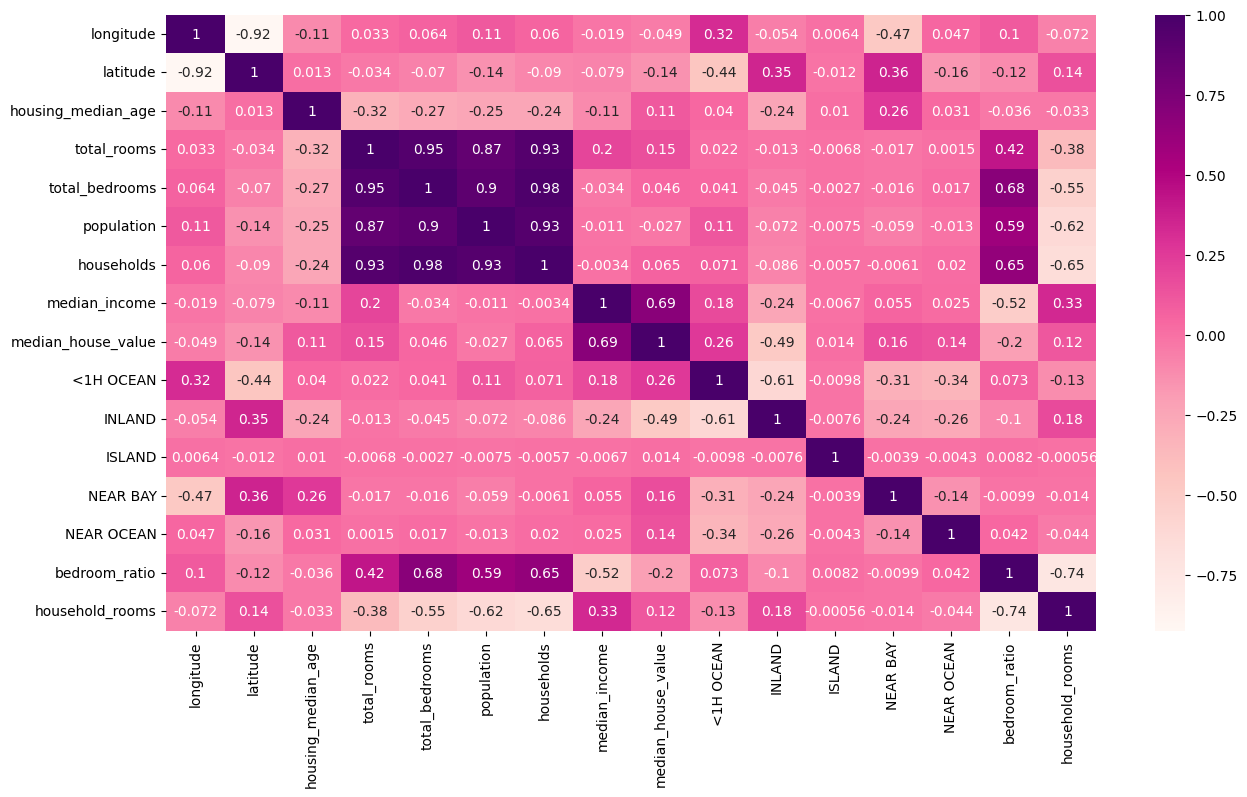

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="RdPu")
plt.show()

### Linear Regression
- Start with a simple Linear Regression model.


### Scaling the Features
- Scale the features using StandardScaler.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler =StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)




### Training the Model
- Train the Linear Regression model on the scaled training data.

In [38]:
reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

### Preparing Test Data
- Preprocess the test data similarly to the training data.

In [39]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


### Evaluating Linear Regression
- Evaluate the Linear Regression model on the test data.

In [40]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.6794614884307998

## Conclusion
---

1.	**Data Preprocessing**:
	-	Essential for normalizing skewed distributions and encoding categorical variables.
	-	Improved the suitability of the data for linear models.

2.	**Feature Engineering**:
	-	Creating new features like bedroom_ratio and household_rooms added valuable information, enhancing model performance.

3.	**Model Evaluation**:
	-	Splitting data before EDA and preprocessing prevented data leakage, ensuring unbiased evaluation.
	-	Linear Regression provided a baseline; Random Forest Regressor improved accuracy, demonstrating the benefits of complex models.

4.	**Exploratory Data Analysis (EDA)**:
	-	Guided feature selection and engineering through understanding feature-target relationships.
	-	Data visualization revealed underlying data patterns.

5.	**Model Performance**:
	-	Linear Regression was simple but limited.